# Local operations

In [11]:
import numpy as np 
import rasterio.plot
from helpers import src_elev, src_landsat

In [12]:
elev = src_elev.read(1)

In [13]:
elev

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30],
       [31, 32, 33, 34, 35, 36]], dtype=uint8)

In [14]:
elev + elev

array([[ 2,  4,  6,  8, 10, 12],
       [14, 16, 18, 20, 22, 24],
       [26, 28, 30, 32, 34, 36],
       [38, 40, 42, 44, 46, 48],
       [50, 52, 54, 56, 58, 60],
       [62, 64, 66, 68, 70, 72]], dtype=uint8)

>Careful of overflow errors, as the dtype is unit8

In [15]:
elev.astype(int)**2

array([[   1,    4,    9,   16,   25,   36],
       [  49,   64,   81,  100,  121,  144],
       [ 169,  196,  225,  256,  289,  324],
       [ 361,  400,  441,  484,  529,  576],
       [ 625,  676,  729,  784,  841,  900],
       [ 961, 1024, 1089, 1156, 1225, 1296]])

In [16]:
elev**2

array([[  1,   4,   9,  16,  25,  36],
       [ 49,  64,  81, 100, 121, 144],
       [169, 196, 225,   0,  33,  68],
       [105, 144, 185, 228,  17,  64],
       [113, 164, 217,  16,  73, 132],
       [193,   0,  65, 132, 201,  16]], dtype=uint8)

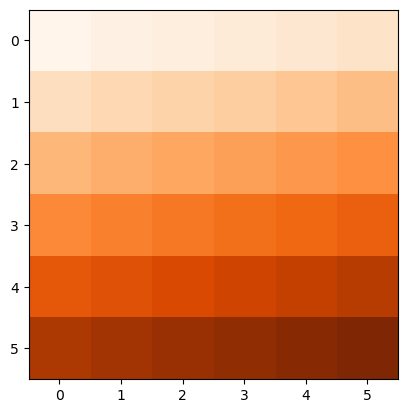

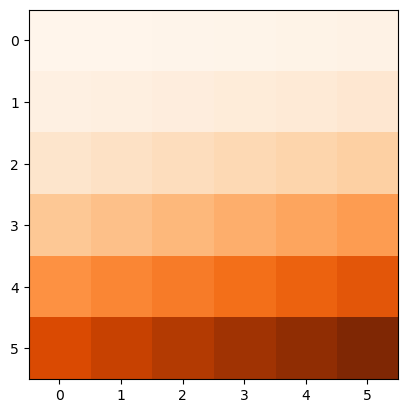

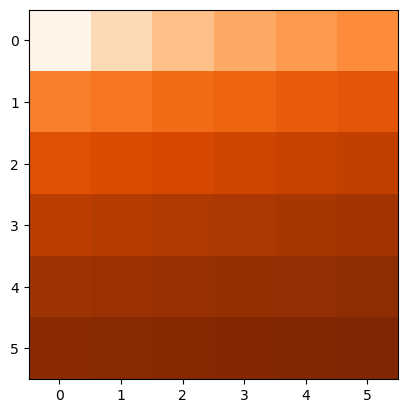

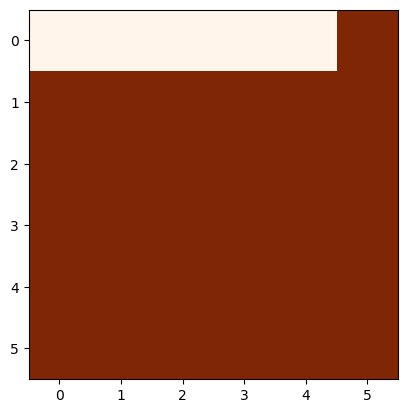

In [17]:
rasterio.plot.show(elev + elev, cmap='Oranges');
rasterio.plot.show(elev.astype(int)**2, cmap='Oranges');
rasterio.plot.show(np.log(elev), cmap='Oranges');
rasterio.plot.show(elev > 5, cmap='Oranges');

>Classification

In [18]:
recl = elev.copy()
recl[(elev > 0) & (elev <= 12)] = 1
recl[(elev > 12) & (elev <= 24)] = 2
recl[(elev > 24) & (elev <= 36)] = 3

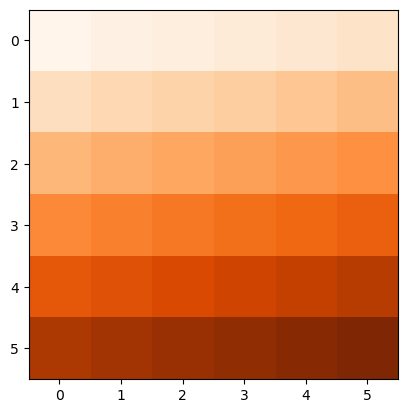

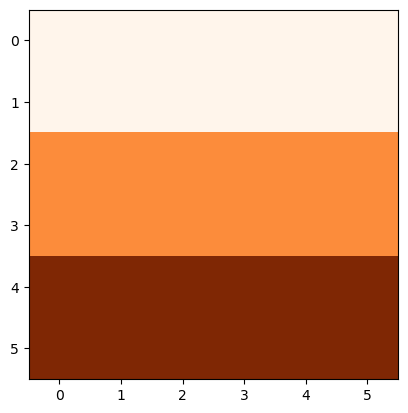

In [19]:
rasterio.plot.show(elev, cmap='Oranges');
rasterio.plot.show(recl, cmap='Oranges');

>Extract the NDVI (Normalized distance vegetation index) from a landsat raster.
>$$NDVI=\frac{NIR-Red} {NIR+Red}
\tag{3.1}$$

In [23]:
landsat = src_landsat.read()
landsat.shape

(4, 1428, 1128)

>The bands are ordered BGRNIR

In [25]:
nir = landsat[3]
red = landsat[2]
ndvi = (nir - red) / (nir + red)

/tmp/ipykernel_1021331/2834009961.py:3: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red) / (nir + red)


In [26]:
ndvi

array([[0.45102915, 0.34518597, 0.3901669 , ..., 0.8047771 , 0.7239896 ,
        0.95826304],
       [0.45822373, 0.39030257, 0.37318897, ..., 0.71891326, 0.84120226,
        0.9090861 ],
       [0.5321104 , 0.4700999 , 0.3677642 , ..., 0.79571277, 0.7822236 ,
        0.92477727],
       ...,
       [0.24113497, 0.2219845 , 0.21393372, ..., 0.34271002, 0.36523512,
        0.35386372],
       [0.23745972, 0.23152038, 0.20987089, ..., 0.40799278, 0.365813  ,
        0.3493257 ],
       [0.21252091, 0.22058986, 0.21808243, ..., 0.46581182, 0.35531932,
        0.3466822 ]], dtype=float32)

In [38]:
landsat_rgb = landsat[2::-1] / landsat.max()

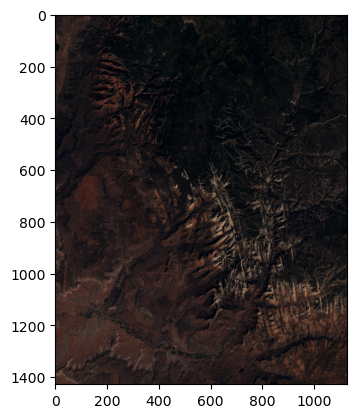

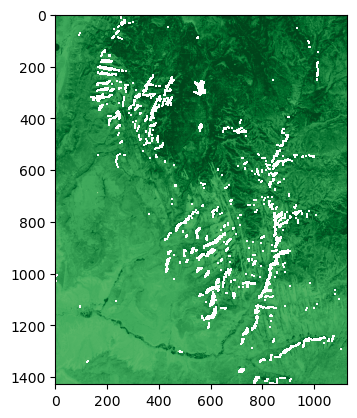

In [40]:
rasterio.plot.show(landsat_rgb, cmap='RdYlGn'); 
rasterio.plot.show(ndvi, cmap='Greens');